# CIFAR100 Digit classification model

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [2]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/2
1563/1563 [==============================] - 28s 18ms/step - loss: 3.9628 - accuracy: 0.0952 - val_loss: 3.4448 - val_accuracy: 0.1760
Epoch 2/2
1563/1563 [==============================] - 27s 17ms/step - loss: 3.2615 - accuracy: 0.2067 - val_loss: 3.0828 - val_accuracy: 0.2460
313/313 - 2s - loss: 3.0828 - accuracy: 0.2460 - 2s/epoch - 6ms/step

Test accuracy: 0.2460000067949295


In [4]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming n_hidden_1, n_hidden_2, num_classes are defined earlier in your code

class NeuralNet(tf.keras.Model):
    # Set Layers.
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First fully-connected hidden Layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)

        # Second fully-connected hidden Layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)

        # Output layer.
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)

        if not is_training:
            # tf cross entropy expects logits without softmax,
            # so only apply softmax when not training.
            x = tf.nn.softmax(x)

        return x

# Build neural network model.
neural_net = NeuralNet()

In [6]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
import tensorflow as tf

# Cross-Entropy Loss
def cross_entropy_loss(x, y):
    # Convert labels to int64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)

    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)

    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy Metric
def accuracy(y_pred, y_true):
    # Predicted class is the index of the highest score in the prediction vector.
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [7]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        # Forward pass
        pred = neural_net(x, is_training=True)

        # Compute Loss
        loss = cross_entropy_loss(pred, y)

    # Variables to update, i.e., trainable variables
    trainable_variables = neural_net.trainable_variables

    # Compute gradients
    gradients = g.gradient(loss, trainable_variables)

    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

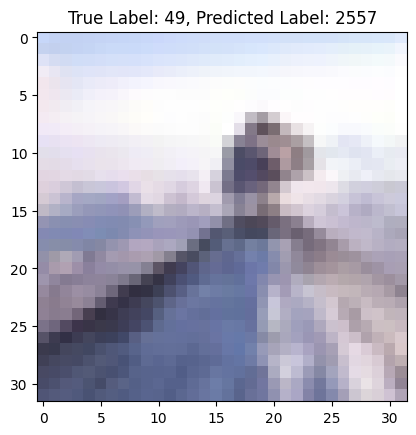

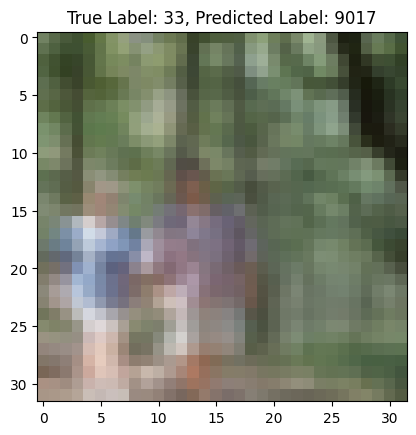

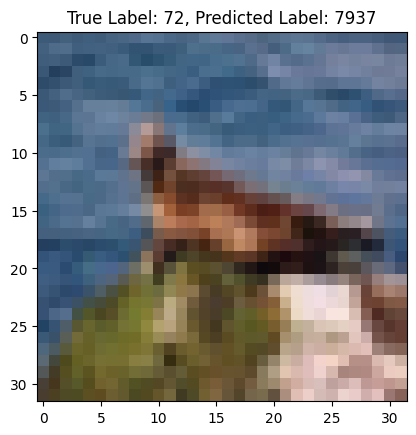

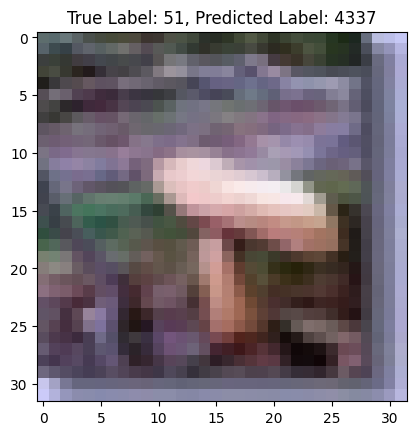

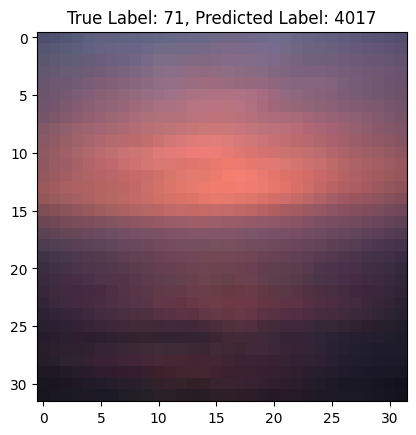

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a neural network model named 'neural_net' and the test set 'x_test'
n_images = 5
test_images = x_test[:n_images]
true_labels = y_test[:n_images]

# Predictions from the model
predictions = neural_net(test_images)

# Display images and model predictions
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [32, 32, 3]), cmap='gray')



    plt.title(f'True Label: {np.argmax(true_labels[i])}, Predicted Label: {np.argmax(predictions[i].numpy())}')
    plt.show()

# MNIST Digit classification model

In [9]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [10]:
#MNIST dataset parameters
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)

#Training parameters
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step= 100

# Network parameters
n_hidden_1 = 128 # 1st Layer number of neurons
n_hidden_2 = 256 # 2nd Layer number of neurons

In [11]:
# Prepare MNIST data
from tensorflow.keras.datasets import mnist
import numpy as np  # Don't forget to import numpy

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28)
num_features = 28 * 28
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1]
x_train, x_test = x_train / 255., x_test / 255.

In [12]:
# Use tf.data API to shuffle and batch data
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
# Create TF Model
class NeuralNet(Model):
    # Set Layers
    def __init__(self):
        super (NeuralNet, self).__init__()
        # First fully-connected hidden Layer
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden Layer
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    # Set forward pass
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.out(x)
        if not is_training:
            #tf cross entropy expect Logits without softmax, so only
            # apply softmax when not training
            x= tf.nn.softmax(x)
        return x

# Build neural network model
neural_net = NeuralNet()

In [14]:
#Cross-Entropy Loss
# Note that this will apply 'softmax' to the Logits
def cross_entropy_loss(x, y):
    # Convert Labels to int 64 for tf cross-entropy function
    y = tf.cast(y, tf.int64)
    # Apply softmax to Logits and compute cross-entropy
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    #Average Loss across the batch
    return tf.reduce_mean(loss)

#Accuracy metric
def accuracy(y_pred, y_true):
    #Predicted class is the index of highest score in prediction vector
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)
                          
#Stochastic gradient descent optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [15]:
#Optimization process..
def run_optimization(x, y):
    #wrap computation inside a GradientTape for automatic differentiation 
    with tf.GradientTape() as g: 
        # Forward pass
        pred = neural_net(x, is_training=True) 
        #Compute Loss
        loss = cross_entropy_loss(pred, y)
    
    # Variables to update, i.e. trainable variables
    trainable_variables = neural_net.trainable_variables
    
    #Compute gradients
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients
    optimizer.apply_gradients (zip(gradients, trainable_variables))

In [16]:
# Run training for the given number of steps
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps)):
    # Run the optimization to update W and b values
    run_optimization (batch_x, batch_y)
                                          
    if step % display_step== 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 0, loss: 2.305834, accuracy: 0.113281
step: 100, loss: 2.045642, accuracy: 0.527344
step: 200, loss: 1.812426, accuracy: 0.742188
step: 300, loss: 1.784929, accuracy: 0.742188
step: 400, loss: 1.727958, accuracy: 0.785156
step: 500, loss: 1.683688, accuracy: 0.832031
step: 600, loss: 1.693738, accuracy: 0.808594
step: 700, loss: 1.673523, accuracy: 0.816406
step: 800, loss: 1.655310, accuracy: 0.824219
step: 900, loss: 1.682889, accuracy: 0.804688
step: 1000, loss: 1.645624, accuracy: 0.839844
step: 1100, loss: 1.671304, accuracy: 0.812500
step: 1200, loss: 1.642834, accuracy: 0.832031
step: 1300, loss: 1.655259, accuracy: 0.828125
step: 1400, loss: 1.652079, accuracy: 0.824219
step: 1500, loss: 1.685794, accuracy: 0.785156
step: 1600, loss: 1.664114, accuracy: 0.808594
step: 1700, loss: 1.663369, accuracy: 0.808594
step: 1800, loss: 1.658811, accuracy: 0.816406
step: 1900, loss: 1.629128, accuracy: 0.851562


In [17]:
#Test model on validation set
pred = neural_net(x_test, is_training=False) 
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.835000


In [18]:
#Visualize predictions
import matplotlib.pyplot as plt

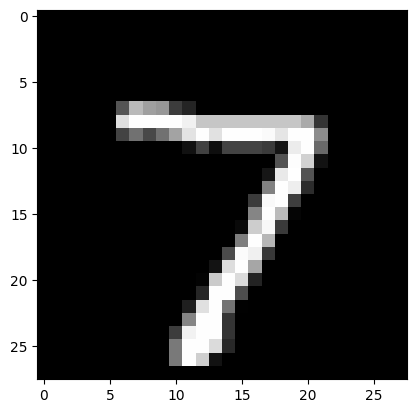

Model prediction: 7


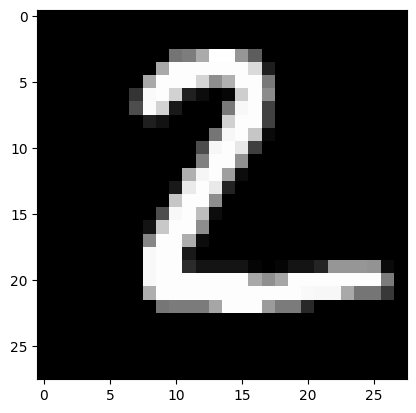

Model prediction: 2


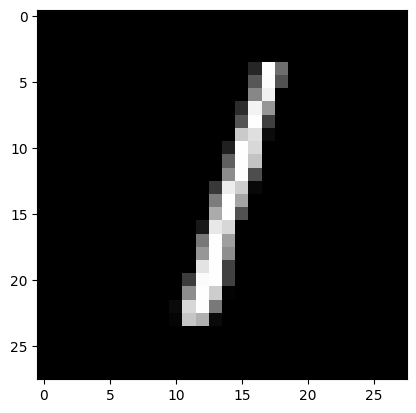

Model prediction: 1


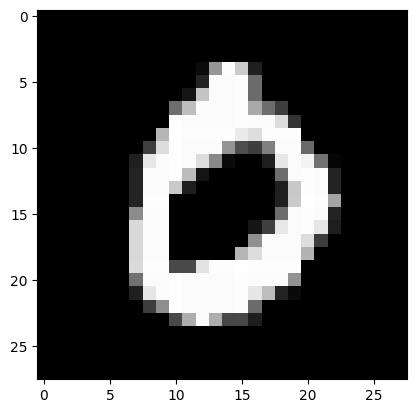

Model prediction: 0


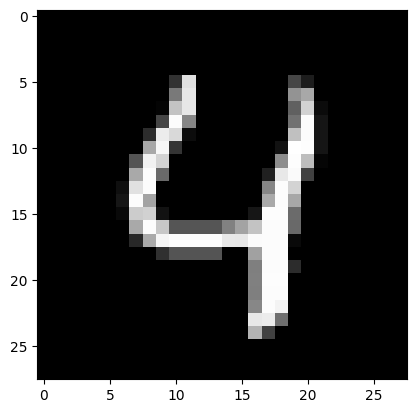

Model prediction: 9


In [19]:
#Predict 5 images from validation set
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction
for i in range(n_images):
    plt.imshow(np.reshape(test_images [i], [28, 28]), cmap='gray') 
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

In [20]:
%matplotlib inline

In [21]:
from IPython.display import Image
%matplotlib inline

UsageError: Line magic function `%matplotlib inline` not found.


# What is TensorFlow?

# First steps with TensorFlow

In [22]:
import tensorflow as tf

# create a graph
g = tf.Graph()

with g.as_default():
    x = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')
    z = w * x + b
    init = tf.compat.v1.global_variables_initializer()

# create a session and pass in graph g
with tf.compat.v1.Session(graph=g) as sess:
    # initialize w and b:
    sess.run(init)

    # evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f' % (t, sess.run(z, feed_dict={x: t})))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [23]:
with tf.compat.v1.Session(graph=g) as sess:
    sess.run(init)
    result = sess.run(z, feed_dict={x: [1.0, 2.0, 3.1]})
    print(result)

[2.7       4.7       6.8999996]


# Working with array structures

In [24]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
    x = tf.keras.Input(shape=(2, 3), dtype=tf.float32, name='input_x')
    
    x2 = tf.reshape(x, shape=(-1, 6), name='x2')

    # calculate the sum of each column
    xsum = tf.reduce_sum(x2, axis=0, name='col_sum')

    # calculate the mean of each column
    xmean = tf.reduce_mean(x2, axis=0, name='col_mean')

with tf.compat.v1.Session(graph=g) as sess:
    x_array = np.arange(18).reshape(3, 2, 3)
    print('input shape:', x_array.shape)
    print('Reshaped: \n', sess.run(x2, feed_dict={x: x_array}))
    print('Column Sums: \n', sess.run(xsum, feed_dict={x: x_array}))
    print('Column Means: \n', sess.run(xmean, feed_dict={x: x_array}))

input shape: (3, 2, 3)
Reshaped: 
 [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sums: 
 [18. 21. 24. 27. 30. 33.]
Column Means: 
 [ 6.  7.  8.  9. 10. 11.]


# Developing a simple model with low-level TensorFlow API

In [25]:
import tensorflow as tf

import numpy as np

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0,9.0])

In [26]:
class TfLinreg(object):
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()

        # build the model
        with self.g.as_default():
            # set graph-level random seed
            tf.random.set_seed(random_seed)
            self.build()

            # create initializer
            self.init_op = tf.compat.v1.global_variables_initializer()

    def build(self):
        # define placeholders for inputs
        self.X = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None, self.x_dim), name='x_input')
        self.y = tf.compat.v1.placeholder(dtype=tf.float32, shape=(None), name="y_input")
        print(self.X)
        print(self.y)

        # define weight matrix and bias vector
        W = tf.Variable(tf.zeros(shape=(1)), name="weight")
        b = tf.Variable(tf.zeros(shape=(1)), name="bias")
        print(W)
        print(b)

        self.z_net = tf.squeeze(W * self.X + b, name='z_net')
        print(self.z_net)

        sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
        print(sqr_errors)

        self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=self.learning_rate, name='GradientDescent')
        self.optimizer = optimizer.minimize(self.mean_cost)

In [27]:
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

Tensor("x_input:0", shape=(None, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32>
<tf.Variable 'bias:0' shape=(1,) dtype=float32>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_errors:0", dtype=float32)


In [28]:
def train_linreg (sess, model, X_train, y_train, num_epochs=10):

 ## initialiaze all variables: W & b
    sess.run(model.init_op)
    training_costs = []
    for i in range(num_epochs):
        _,cost= sess.run([model.optimizer, model.mean_cost], feed_dict={model.X:X_train, model.y:y_train})
        training_costs.append(cost)
    return training_costs

In [29]:
sess = tf.compat.v1.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

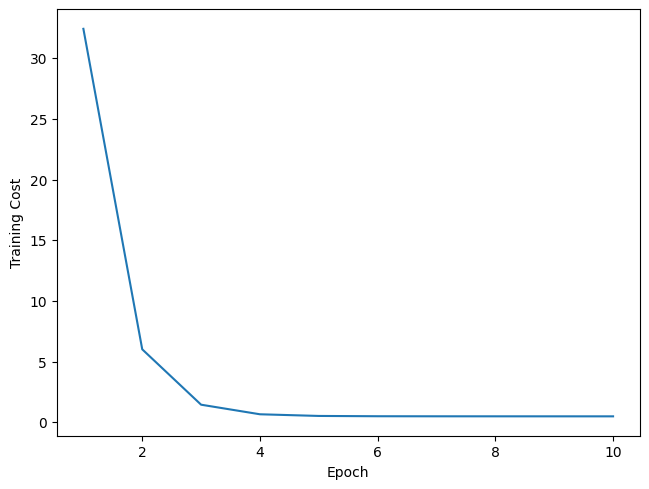

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(training_costs)+ 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

#plt.savefig(images/13_01.png, dpi-300)

In [31]:
def predict_linreg (sess, model, X_test):
    y_pred = sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

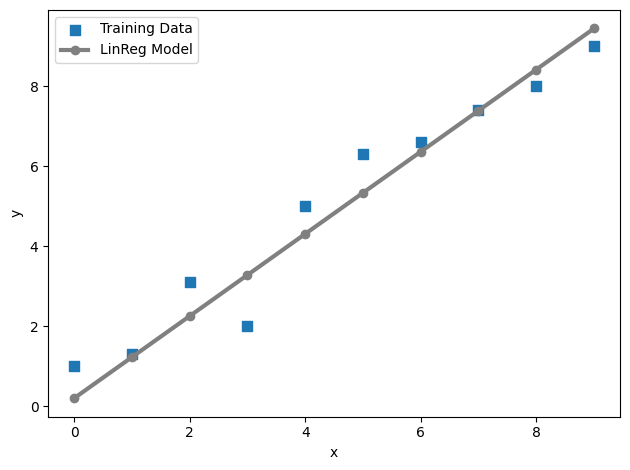

In [32]:
plt.scatter (X_train, y_train, marker='s', s=50, label= 'Training Data')

plt.plot(range(X_train.shape[0]), predict_linreg(sess, lrmodel, X_train), color='gray', marker='o', markersize=6, linewidth=3, label='LinReg Model')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
#plt.savefig(images/13_02.png')
plt.show()

# Keras Sequential API for MNIST digit classification

In [33]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [34]:
batch_size = 128
num_classes = 10
epochs = 20

In [35]:
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print('Shape-x:\t', xtrain.shape)
print('Shape-y:\t', ytrain.shape)

Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [36]:
xtrain = xtrain.reshape(60000, 784)
xtest = xtest.reshape(10000, 784)
print('Shape-x-train:\t', xtrain.shape)
print('Shape-x-test:\t', xtest.shape)

Shape-x-train:	 (60000, 784)
Shape-x-test:	 (10000, 784)


In [37]:
xtrain = xtrain.astype('float32')
xtest= xtest.astype('float32')

In [38]:
xtrain = xtrain/255.
xtest = xtest/255.

# Print the shape of data

In [39]:
print(xtrain.shape[0], 'train samples')
print(xtest.shape[0], 'test samples')

60000 train samples
10000 test samples


# Convert class vectors to binary class matrices

In [40]:
import keras
ytrain = keras.utils.to_categorical(ytrain, num_classes)
ytest = keras.utils.to_categorical(ytest, num_classes)

In [41]:
ytrain.shape

(60000, 10)

# Sequential Model

In [42]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

# Fit the model

In [44]:
history = model.fit(xtrain, ytrain,
                    batch_size = batch_size,
                    epochs = epochs, verbose = 2, 
                    validation_data = (xtest, ytest))
score = model.evaluate(xtest, ytest, verbose = 1)

Epoch 1/20
469/469 - 5s - loss: 0.2262 - accuracy: 0.9303 - val_loss: 0.1077 - val_accuracy: 0.9662 - 5s/epoch - 10ms/step
Epoch 2/20
469/469 - 4s - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.0945 - val_accuracy: 0.9719 - 4s/epoch - 9ms/step
Epoch 3/20
469/469 - 4s - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0761 - val_accuracy: 0.9766 - 4s/epoch - 9ms/step
Epoch 4/20
469/469 - 4s - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0743 - val_accuracy: 0.9782 - 4s/epoch - 9ms/step
Epoch 5/20
469/469 - 4s - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0610 - val_accuracy: 0.9812 - 4s/epoch - 9ms/step
Epoch 6/20
469/469 - 4s - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0728 - val_accuracy: 0.9815 - 4s/epoch - 9ms/step
Epoch 7/20
469/469 - 4s - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0665 - val_accuracy: 0.9838 - 4s/epoch - 9ms/step
Epoch 8/20
469/469 - 4s - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.0863 - val_accuracy: 0.9802 - 4s/epoch - 9ms/step
Epoch 9/20
469/469 - 4s

In [45]:
print('Test Loss:\t', score[0])
print('Test Accuracy:\t', score[1])

Test Loss:	 0.0883968248963356
Test Accuracy:	 0.9860000014305115
